In [1]:
from tethered_gated_weichsel_schwarz import *

In [2]:
from numpy import linspace, logspace, zeros
no_cap_conc = 10
no_replicates = 100
cap_rate_const_row = logspace(-4.0, -1, no_cap_conc, base = 10.0)
growth_rate_mat = zeros((no_cap_conc, no_replicates))
alpha_order_param_mat = zeros((no_cap_conc, no_replicates))
nucleation_rate_mat = zeros((no_cap_conc, no_replicates))
assembly_rate_mat = zeros((no_cap_conc, no_replicates))

In [3]:
def simulate_assembly(cap_rate_const):
    actin_network = network()
    actin_network.cap_rate_const = cap_rate_const
    actin_network.time_interval = 1e-2
    actin_network.simulate()
    actin_network.compute_alpha_order()
    growth_rate = actin_network.x_leading / actin_network.time * 6e-2
    nucleation_rate = (actin_network.no_filaments - 200) / actin_network.time
    assembly_rate = actin_network.no_monomers / actin_network.time
    alpha_order_param = actin_network.alpha_order_param
    return growth_rate, alpha_order_param, nucleation_rate, assembly_rate

In [4]:
from joblib import Parallel, delayed
for i_conc in range(no_cap_conc):
    output = Parallel(n_jobs = -1)(delayed(simulate_assembly)(cap_rate_const_row[i_conc]) for i in range(no_replicates))
    for j_rep in range(no_replicates):
        growth_rate_mat[i_conc, j_rep] = output[j_rep][0]
        alpha_order_param_mat[i_conc, j_rep] = output[j_rep][1]
        nucleation_rate_mat[i_conc, j_rep] = output[j_rep][2]
        assembly_rate_mat[i_conc, j_rep] = output[j_rep][3]

Text(0, 0.5, 'Growth rate ($\\mu$m / min)')

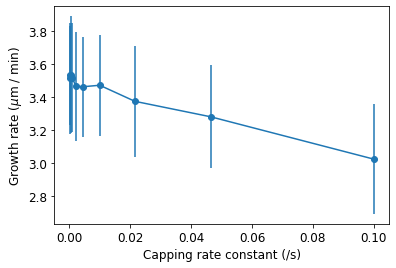

In [5]:
%matplotlib inline
from numpy import mean, std
fig1_hand, axes1_hand = subplots()
axes1_hand.errorbar(cap_rate_const_row, mean(growth_rate_mat, axis = 1), yerr = std(growth_rate_mat, axis = 1), fmt = 'o-')
axes1_hand.tick_params(labelsize = 12)
axes1_hand.set_xlabel('Capping rate constant (/s)', fontsize = 12)
axes1_hand.set_ylabel('Growth rate ($\mu$m / min)', fontsize = 12)

Text(0, 0.5, 'Nucleation rate (/s)')

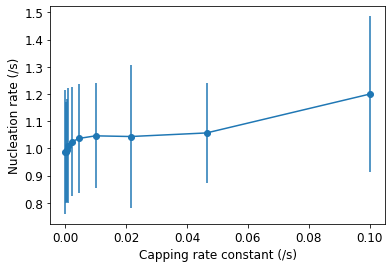

In [6]:
from numpy import mean, std
fig2_hand, axes2_hand = subplots()
axes2_hand.errorbar(cap_rate_const_row, mean(nucleation_rate_mat, axis = 1), yerr = std(nucleation_rate_mat, axis = 1), fmt = 'o-')
axes2_hand.tick_params(labelsize = 12)
axes2_hand.set_xlabel('Capping rate constant (/s)', fontsize = 12)
axes2_hand.set_ylabel('Nucleation rate (/s)', fontsize = 12)

Text(0, 0.5, 'Assembly rate (monomers/s)')

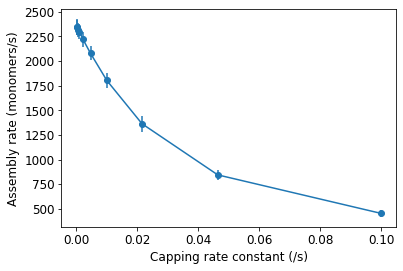

In [7]:
fig3_hand, axes3_hand = subplots()
axes3_hand.errorbar(cap_rate_const_row, mean(assembly_rate_mat, axis = 1), yerr = std(assembly_rate_mat, axis = 1), fmt = 'o-')
axes3_hand.tick_params(labelsize = 12)
axes3_hand.set_xlabel('Capping rate constant (/s)', fontsize = 12)
axes3_hand.set_ylabel('Assembly rate (monomers/s)', fontsize = 12)

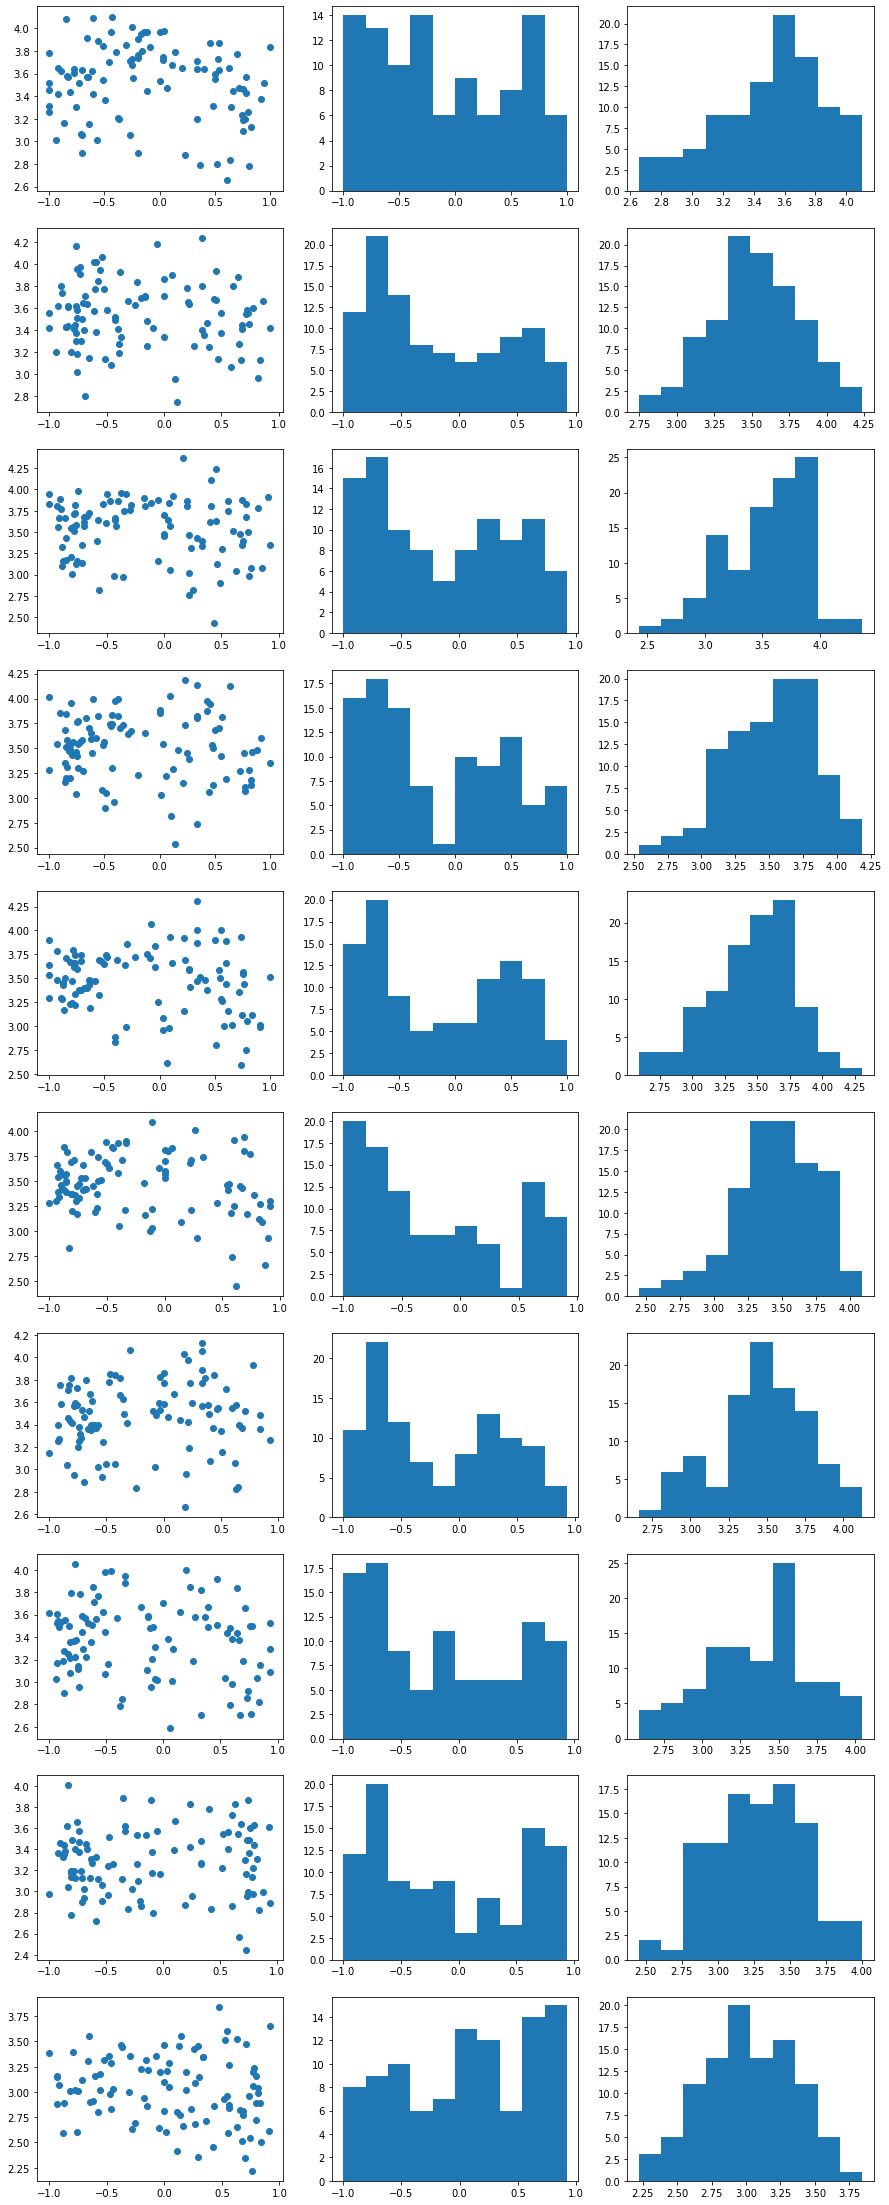

In [8]:
fig4_hand, axes4_hand = subplots(nrows = no_cap_conc, ncols = 3, sharex = False, sharey = False)
fig4_hand.set_figheight(40)
fig4_hand.set_figwidth(15)
for i_conc in range(no_cap_conc):
    axes4_hand[i_conc, 0].scatter(alpha_order_param_mat[i_conc, :], growth_rate_mat[i_conc, :])
    axes4_hand[i_conc, 1].hist(alpha_order_param_mat[i_conc, :])
    axes4_hand[i_conc, 2].hist(growth_rate_mat[i_conc, :])